In [1]:
# Load the libs
import framework
import numpy as np

In [2]:
data_sample = np.load('sample_data.npz')
# Load the sample data for testing the framework
data_frames = data_sample.f.data_frames
frame_label = data_sample.f.frame_label
frame_subject = data_sample.f.frame_subject

data_frames = np.reshape(data_frames, newshape=(data_frames.shape[0], data_frames.shape[1], data_frames.shape[2], 1))


In [3]:
# Select the frame labels
select_idx = [i for i, e in enumerate(frame_label) if e == 0 or e == 2]
data_frames_s = data_frames[select_idx]
frame_label_s = frame_label[select_idx]
frame_subject_s = frame_subject[select_idx]

In [4]:
subject_unique = np.unique(frame_subject_s)

In [5]:
class_unique = np.unique(frame_label_s)
class_unique = class_unique.tolist()
class_count = len(class_unique)
class_labels_n = []
for fl in frame_label_s:
    class_labels_n.append(class_unique.index(fl))
class_labels_n = np.asarray(class_labels_n)

In [6]:
main_losses = []
adv_losses = []
main_accs = []
adv_accs = []
cf_mat = []
test_accs = []
for exl in range(36):
    ad_model = framework.AdversarialModel(data_samples = data_frames_s, class_label=class_labels_n, subject_label=frame_subject_s, exclude_idx=exl, lam1=0.5, lam2=0.75)
    subject_num, subject_count = np.unique(frame_subject_s, return_counts=True)
    main_loss, adv_loss, main_acc, adv_acc, cf_matrix, test_acc = ad_model.train()
    print('The testing accuracy is ' + str(test_acc))
    main_losses.append(main_loss)
    adv_losses.append(adv_loss)
    main_accs.append(main_acc)
    adv_accs.append(adv_acc)
    cf_mat.append(cf_matrix)
    test_accs.append(test_acc)

TypeError: __init__() got an unexpected keyword argument 'lam'

In [ ]:
print(main_acc)

[tensor(49.1781), tensor(49.1781), tensor(49.1781), tensor(49.1781), tensor(49.5890), tensor(49.8630), tensor(50.1370), tensor(51.3699), tensor(55.3425), tensor(58.2192), tensor(61.3699), tensor(64.2466), tensor(65.7534), tensor(67.3973), tensor(68.3562), tensor(72.1918), tensor(73.2877), tensor(74.3836), tensor(74.3836), tensor(77.2603), tensor(79.0411), tensor(78.0822), tensor(81.2329), tensor(81.5069), tensor(83.9726), tensor(84.2466), tensor(83.5616), tensor(85.4795), tensor(85.4795), tensor(88.6301), tensor(89.8630), tensor(90.5479), tensor(90.5479), tensor(91.7808), tensor(92.7397), tensor(93.5616), tensor(94.2466), tensor(95.3425), tensor(96.9863), tensor(96.5753), tensor(96.9863), tensor(97.8082), tensor(98.3562), tensor(98.7671), tensor(98.7671), tensor(99.3151), tensor(99.3151), tensor(99.1781), tensor(99.5890), tensor(99.7260)]


In [ ]:
print(adv_acc)

[tensor(71.5069), tensor(72.3288), tensor(71.3699), tensor(70.1370), tensor(68.3562), tensor(63.9726), tensor(59.0411), tensor(54.5205), tensor(48.3562), tensor(42.0548), tensor(35.7534), tensor(30.5479), tensor(26.1644), tensor(22.8767), tensor(17.5342), tensor(13.6986), tensor(11.0959), tensor(8.7671), tensor(7.8082), tensor(6.8493), tensor(5.8904), tensor(5.2055), tensor(4.5205), tensor(4.1096), tensor(4.1096), tensor(3.4247), tensor(2.7397), tensor(1.7808), tensor(1.5068), tensor(1.5068), tensor(1.3699), tensor(0.9589), tensor(0.9589), tensor(0.6849), tensor(0.8219), tensor(0.6849), tensor(0.6849), tensor(0.8219), tensor(0.8219), tensor(0.8219), tensor(0.8219), tensor(0.8219), tensor(0.8219), tensor(0.8219), tensor(0.8219), tensor(0.8219), tensor(0.8219), tensor(0.8219), tensor(0.8219), tensor(0.8219)]


In [ ]:
print(test_acc)

0.34615384615384615


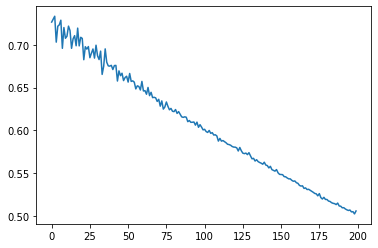

In [ ]:
import matplotlib.pyplot as plt
plt.plot(main_losses)

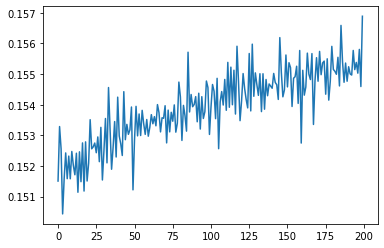

In [ ]:
plt.plot(adv_losses)